In [114]:
import numpy as np
import matplotlib.pyplot as plt 


1. Synapse Simulation 


In [115]:
T = 1000
dt = 0.1 
total_steps = int(T/dt)
t_rest = 0
V_0 = 0
V = 0
R_L = 1
tau_m = 10
t_ref = 5
V_th = 12 
I =14 


In [116]:
E_syn = 0
g_bar_syn = 10  # constant 
g_syn = 0 
t_syn = 10 # constant 


In [117]:
def update_membrane_potential(V,I):
    """ calculate """
    V= V + ((-V + I * R_L) / tau_m ) * dt 
    return V 


In [118]:
def update_g_syn(g_syn, spike_voltage_values):
    g_syn = g_syn + g_bar_syn * sum(spike_voltage_values) - g_syn / t_syn
    
    return g_syn


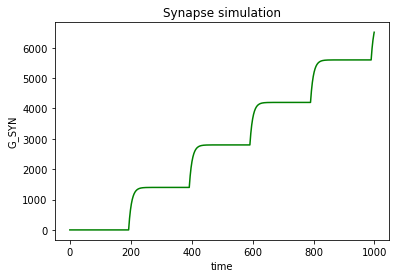

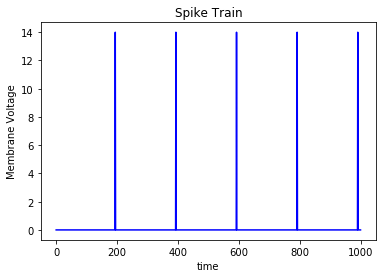

In [119]:
voltage_values = []
time_values = []
g_syn_values = []
spike_voltage = []

for _time in range(total_steps):
    if _time > t_rest:
        V = update_membrane_potential(V, I)  # update membrane potential 
    else:
        V = 0
    if V >= V_th:
        V = V_th + 2
        spike_voltage.append(V)
        t_rest = _time + t_ref 
    else:
        spike_voltage.append(0)
        
    g_syn = update_g_syn(g_syn, spike_voltage)
    g_syn_values.append(g_syn)
    
        
    voltage_values.append(V)
    time_values.append(_time)
    
plt.plot(time_values[0:1000], g_syn_values[0:1000], color="g")
plt.title("Synapse simulation")
plt.xlabel("time")
plt.ylabel("G_SYN")
plt.show()

plt.plot(time_values[0:1000], spike_voltage[0:1000], color="b")
plt.title("Spike Train")
plt.xlabel("time")
plt.ylabel("Membrane Voltage")
plt.show()



1. Hodgkin-Hyxley neuron Simulation 

In [120]:
C = 10
g_L = 0.003 
g_K = 0.36 
g_Na = 1.2 
E_K = -77 
E_L = -54.387 
E_Na = 50 
dt = 0.1 
I = 200 



In [121]:
def alpha_n (v):
    return (0.01 * (V + 55)) / (1 - np.exp(-(V+55)/ 10))

def alpha_m(V):
    return (0.1 * (V + 40)) / (1 - np.exp((V+40)/10))

def alpha_h(V):
    return 0.07 * np.exp(-(V+65)/20)

def beta_n(V):
    return 0.125 * np.exp(-(V+65)/80)

def beta_m(V):
    return 4 * np.exp(-(V + 65)/18)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35)/10))


In [125]:
def update_x(x, alpha, beta):
    return alpha * (1 - x) - beta * x

def update_membrane_potential(V, m,n,h, g_K):
    V = V + ((-g_Na * m**3 * h * (V - E_Na) - g_K * n**4 * (V - E_K) - g_L * (V - E_L) + I) / C) * dt
    
    return V


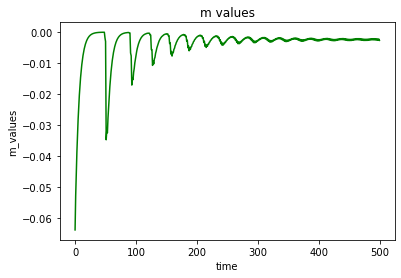

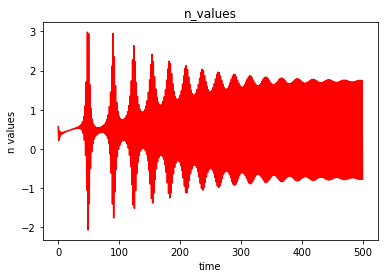

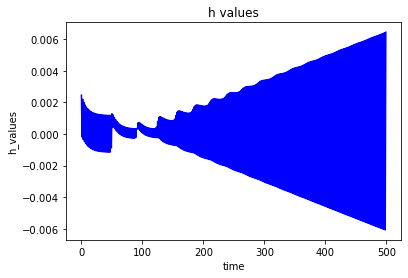

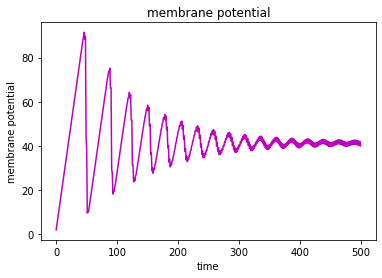

In [126]:
T = 1000
dt = 0.1 
total_steps = int(T/dt)

membrane_potential = []
time_values = []
m_values = []
n_values = []
h_values = []
V = 0
m=n=h=0

for _time in range(total_steps):
    
    V = update_membrane_potential(V, m, n, h, g_K)
    
    m = update_x(m, alpha_m(V), beta_m(V))
    n = update_x(n, alpha_n(V), beta_n(V))
    h = update_x(h, alpha_h(V), beta_h(V))
    
    #V = update_membrane_potential(V, m, n, h)
    
    m_values.append(m)
    n_values.append(n)
    h_values.append(h)
    membrane_potential.append(V)
    
    time_values.append(_time)
    
    

    
plt.plot(time_values[0:500], m_values[0:500], color="g")
plt.title("m values")
plt.xlabel("time")
plt.ylabel("m_values")
plt.show()

plt.plot(time_values[0:500], n_values[0:500], color="r")
plt.title("n_values")
plt.xlabel("time")
plt.ylabel("n values")
plt.show()


plt.plot(time_values[0:500], h_values[0:500], color="b")
plt.title("h values")
plt.xlabel("time")
plt.ylabel("h_values")
plt.show()


plt.plot(time_values[0:500], membrane_potential[0:500], color="m")
plt.title("membrane potential")
plt.xlabel("time")
plt.ylabel("membrane potential")
plt.show()

  

question 2. 2

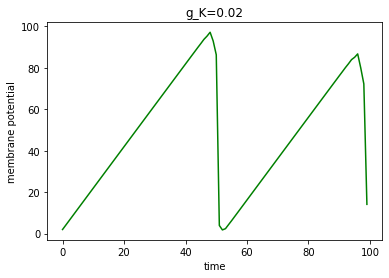

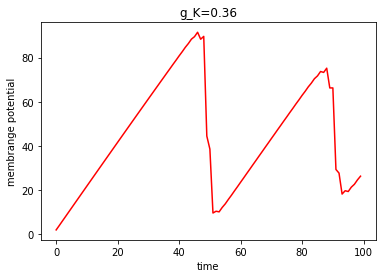

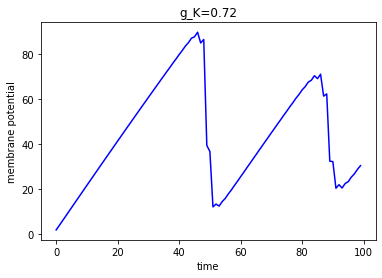

In [131]:
voltage_gk1 = []
voltage_gk2 = []
voltage_gk3 = []
time_values = []
V = m = n = h = 0
for _time in range(total_steps):
    
    V = update_membrane_potential(V, m, n, h, 0.02)
    
    m = update_x(m, alpha_m(V), beta_m(V))
    n = update_x(n, alpha_n(V), beta_n(V))
    h = update_x(h, alpha_h(V), beta_h(V))
    
   
    
   
    voltage_gk1.append(V)
    
    time_values.append(_time)
    

plt.plot(time_values[0:100], voltage_gk1[0:100], color="g")
plt.title("g_K=0.02")
plt.xlabel("time")
plt.ylabel("membrane potential")
plt.show()

time_values = []
V = m = n = h = 0 

for _time in range(total_steps):
    
    V = update_membrane_potential(V, m, n, h, 0.36)
    
    m = update_x(m, alpha_m(V), beta_m(V))
    n = update_x(n, alpha_n(V), beta_n(V))
    h = update_x(h, alpha_h(V), beta_h(V))
    
   
    
   
    voltage_gk2.append(V)
    
    time_values.append(_time)
    


plt.plot(time_values[0:100], voltage_gk2[0:100], color="r")
plt.title("g_K=0.36")
plt.xlabel("time")
plt.ylabel("membrange potential")
plt.show()

time_values = []
V = m = n = h = 0

for _time in range(total_steps):
    
    V = update_membrane_potential(V, m, n, h, 0.72)
    
    m = update_x(m, alpha_m(V), beta_m(V))
    n = update_x(n, alpha_n(V), beta_n(V))
    h = update_x(h, alpha_h(V), beta_h(V))
    
   
    
   
    voltage_gk3.append(V)
    
    time_values.append(_time)
    

plt.plot(time_values[0:100], voltage_gk3[0:100], color="b")
plt.title("g_K=0.72")
plt.xlabel("time")
plt.ylabel("membrane potential")
plt.show()



Obsevation: Spikes are happening at  same time.